In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Approximation of uniform

In [187]:
low = 0
up = 1

N = 2

list_pi = [round(1.0/N,4)]*N
list_mu = [round(low+i*(up-low)/N+((up-low)/(2*N)),3) for i in range(N)]
list_sigma = list([round((up-low)/(np.sqrt(12)*N),4)]*N)
    
print(list_pi, ',', list_mu, ',', list_sigma)

[0.5, 0.5] , [0.25, 0.75] , [0.1443, 0.1443]


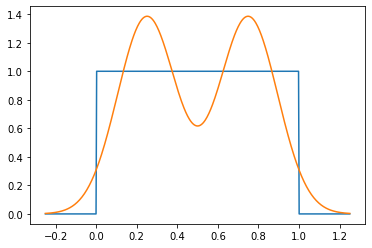

In [188]:
x = np.linspace(low-0.25*(up-low), up+0.25*(up-low), 500)

plt.plot(x, [1/(up-low) if (xi > low and xi < up) else 0 for xi in x])
plt.plot(x, [sum([list_pi[0]*norm.pdf(xi,loc=list_mu[k],scale=list_sigma[k]) for k in range(len(list_mu))]) for xi in x])

In [178]:
unif_samples = np.random.uniform(low,up,size=5000).reshape(-1,1)

n_comp = 4

gm = GaussianMixture(n_comp)
gm.fit(unif_samples)

pi = list([round(weight,2) for weight in gm.weights_])
mu = list([round(mean[0],2) for mean in gm.means_])
sigma = list([round(np.sqrt((var[0][0])),2) for var in gm.covariances_])

pi, mu, sigma

([0.24, 0.25, 0.25, 0.26], [1.89, 4.32, 0.68, 3.11], [0.45, 0.41, 0.41, 0.46])

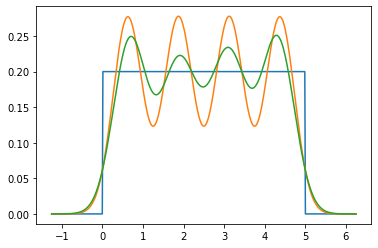

In [179]:
y_gm = [sum([pi[i]*norm.pdf(xi,mu[i],sigma[i]) for i in range(n_comp)]) for xi in x]


plt.plot(x, [1/(up-low) if (xi > low and xi < up) else 0 for xi in x])
plt.plot(x, [sum([list_pi[0]*norm.pdf(xi,loc=list_mu[k],scale=list_sigma[k]) for k in range(len(list_mu))]) for xi in x])
plt.plot(x, y_gm)

# Approximation of beta

In [5]:
a1 = 2
a2 = 5

mean = a1/(a1+a2)
sigma = np.sqrt((a1*a2)/((a1+a2+1)*(a1+a2)**2))

mean, sigma

(0.2857142857142857, 0.15971914124998499)

In [6]:
from scipy.stats import beta
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

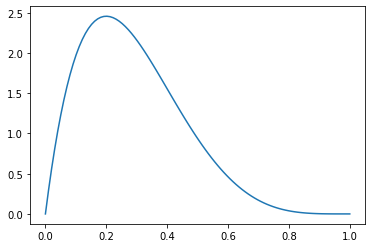

In [7]:
x = np.linspace(0,1,100)
y_beta = [beta.pdf(xi, 2, 5) for xi in x]

plt.plot(x, y_beta)

In [8]:
beta_samples = beta.rvs(2,5,size=100).reshape(-1,1)

n_comp = 2

gm = GaussianMixture(n_comp)
gm.fit(beta_samples)

GaussianMixture(n_components=2)

In [9]:
pi = list([round(weight,2) for weight in gm.weights_])
mu = list([round(mean[0],2) for mean in gm.means_])
sigma = list([round(np.sqrt(var[0][0]),2) for var in gm.covariances_])

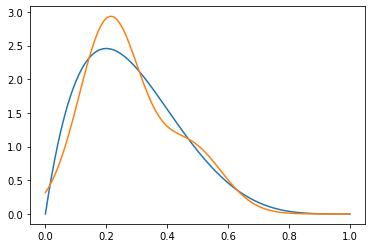

In [10]:
x = np.linspace(0,1,100)
y_beta = [beta.pdf(xi, 2, 5) for xi in x]

y_gm = [sum([pi[i]*norm.pdf(xi,mu[i],sigma[i]) for i in range(n_comp)]) for xi in x]

plt.plot(x, y_beta)
plt.plot(x, y_gm)

In [13]:
pi, mu, sigma

([0.72, 0.28], [0.21, 0.47], [0.1, 0.11])